# Guide for Authors

This workbook compiles the most important conventions for all book chapters.


## Organization of this Book

### Chapters  as Notebooks

Each chapter comes in its own _Jupyter notebook_.  A single notebook (= a chapter) should cover the material (text and code, possibly slides) for a 90-minute lecture.

A chapter notebook should be named `cNN_Topic.ipynb`, where `NN` is the number of the chapter, and `Topic` is the topic.

### Output Formats

The notebooks by themselves can be used by instructors and students to toy around with.  They can edit code (and text) as they like and even run them as a slide show.

The notebook can be _exported_ to multiple (non-interactive) formats:
* HTML - for placing this material online.
* PDF - for printing (and selling :-)
* Python - for coding

The default export options already do a good job in producing these formats; however, there also is a Makefile that generates all of these automatically.

### The Book

At this point, we can only produce individual chapters (notebooks); these eventually will all be compiled into a single book (= a single PDF file)

## Code

### Set up

The first code block in each notebook should be

In [1]:
import gstbook

This sets up stuff such that notebooks can import each other's code (see below). This import statement may be removed in exported Python code and PDF/HTML versions, as it would not be needed there.

### Using notebooks as modules

Each notebook becomes a _module_ in Python which can be imported by others.  Hence, ensure that code has no side effects (say, `print` statements) when loaded.  If necessary, guard statements to be run in the notebool only with `if __name__ == '__main__':`}

### Using code from other modules

To import the code of individual notebooks, you can import directly from the .ipynb file:

In [2]:
from ch01_Fuzzer import fuzzer
fuzzer(100, ord('0'), 10)

importing Jupyter notebook from ch01_Fuzzer.ipynb


'418655427319022234162993347851489442135051633291608613469536946573'

The exported Python code will import from the respective .py file instead.

Since chapter numbers will change over time, please
* have all imports at the beginning of the workbook
* import and reference each chapter exactly once

## Writing

Text blocks use Markdown syntax.  [Here is a handy guide](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).


### Highlighting

Use

* _emphasis_ for highlighting,
* `backticks` for code and other verbatim elements.


### Environments

You can use bulleted lists:

* Item A
* Item B

and enumerations:

1. item 1
1. item 2

Description lists are possible using HTML tags, but should be avoided (as HTML in general):

<dl>
  <dt>Definition lists</dt>
  <dd>is something people use sometimes.</dd>
  
  <dt>HTML elements</dt>
  <dd>are in general possible, but use sparingly.</dd>
</dl>


### Math

LaTeX math formatting works, too: $x = \sum_{n = 1}^{\infty}\frac{1}{n}$


### Inline Code

Python code normally goes into its own cells, but you can also have it in the text:

```python
s = "Python syntax highlighting"
print s
```

### Sections

Any chapter notebook must begin with `# TITLE`, and sections and subsections should then follow by `## SECTION` and `### SUBSECTION`.

Sections should start with their own block, to facilitate cross-referencing.


### Cross-Referencing

* To refer to sections in the same notebook, use the header name as anchor, e.g. [Code](#Code).  For multi-word titles, replace spaces by hyphens (`-`), as in [Using notebooks as modules](#Using-notebooks-as-modules).
* To refer to other notebooks, use a Markdown cross-reference to the file, e.g. [the "Fuzzing" chapter](ch01_Fuzzing.ipynb).  A special script will be run to take care of these links.  Reference chapters by name, not by number.

### Citations

To cite papers, cite in LaTeX style: \cite{purdom1972}.  The keys refer to BibTeX entries in [gstbook.bib](gstbook.bib).  

* PDF output will have a "References" section appended.
* HTML output will link to the URL field from the BibTeX entry. Be sure it points to the DOI.

## Interaction

It is possible to include interactive elements in a notebook, as in the following example:

In [3]:
try:
    from ipywidgets import interact, interactive, fixed, interact_manual

    x = interact(fuzzer, max_length=(0, 1000, 100), char_start=(32, 128), char_range=(0, 96))
except ImportError:
    pass

interactive(children=(IntSlider(value=100, description='max_length', max=1000, step=100), IntSlider(value=32, description='char_start', max=128, min=32), IntSlider(value=32, description='char_range', max=96), Output()), _dom_classes=('widget-interact',))

Note that such elements will be present in the notebook versions only, but not in the HTML and PDF versions, so use them sparingly.  To avoid errors during production, protect against `ImportError` exceptions as in the above example.

## Tables

Tables with fixed contents can be produced using Markdown syntax:

| Tables | Are | Cool |
| ------ | ---:| ----:|
| Zebra  | 2   |   30 |
| Gnu    | 20  |  400 |


If you want to produce tables from Python data, the `PrettyTable` package (included in the book) allows to [produce tables with LaTeX-style formatting.](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook)

In [4]:
import numpy as np
data = np.array([[1,2,30],[2,3,400]])

import gstbook.PrettyTable as pt
pt.PrettyTable(data, [r"$\frac{a}{b}$", r"$b$", r"$c$"], print_latex_longtable=False)

$\frac{a}{b}$,$b$,$c$
1,2,30
2,3,400


## Plots and Data

It is possible to include plots in notebooks.  Here is an example:

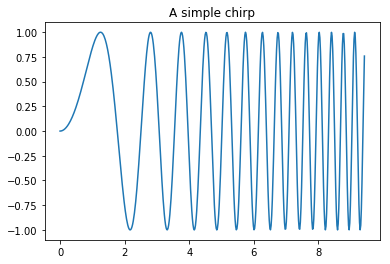

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

Plots are available in all derived versions (HTML, PDF, etc.)

## Read More

1. [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) - general introduction to Markdown

1. [Making Publication-Ready Python Notebooks](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook) - details on how to produce book chapters from notebooks

1. [Writing academic papers in plain text with Markdown and Jupyter notebook](https://sylvaindeville.net/2015/07/17/writing-academic-papers-in-plain-text-with-markdown-and-jupyter-notebook/) - important info on how to generate citations

1. [A Jupyter LaTeX template](https://gist.github.com/goerz/d5019bedacf5956bcf03ca8683dc5217#file-revtex-tplx) - How to define a LaTeX template

1. [iPyPublish](https://github.com/chrisjsewell/ipypublish) - rich set of tools to create documents with citations and references
